In [7]:
from pandas.core import frame

In [28]:
from finance_fns import stock_data

In [4]:
naver_code = stock_data.find_code('NAVER')
naver_code

'035420'

In [5]:
naver_close_df = stock_data.get_close_df(naver_code, start_date='2024-6')
naver_close_df

,Close
Date,
2024-06-03,172700
2024-06-04,176800
2024-06-05,177100
2024-06-07,175400
2024-06-10,170700
...,...
2024-12-09,201500
2024-12-10,209000
2024-12-11,218000


In [16]:
def return_rate(df: frame.DataFrame) -> frame.DataFrame:
    adder = stock_data.add_to_df(df)
    adder('return', lambda df: df['Close'].pct_change().fillna(0))
    adder('cum_return', lambda df: (1 + df['return']).cumprod())
    adder('max_cum_return', lambda df: df['cum_return'].cummax())
    new_df = adder('draw_down', lambda df: (df['cum_return'] / df['max_cum_return']) - 1)

    return new_df


In [17]:
naver_return_df = return_rate(naver_close_df)
naver_return_df

,Close,return,cum_return,max_cum_return,draw_down
Date,,,,,
2024-06-03,172700,0.000000,1.000000,1.000000,0.000000e+00
2024-06-04,176800,0.023741,1.023741,1.023741,0.000000e+00
2024-06-05,177100,0.001697,1.025478,1.025478,0.000000e+00
2024-06-07,175400,-0.009599,1.015634,1.025478,-9.599097e-03
2024-06-10,170700,-0.026796,0.988419,1.025478,-3.613778e-02
...,...,...,...,...,...
2024-12-09,201500,-0.014670,1.166763,1.210191,-3.588517e-02
2024-12-10,209000,0.037221,1.210191,1.210191,-2.220446e-16
2024-12-11,218000,0.043062,1.262305,1.262305,0.000000e+00


In [18]:
print(naver_return_df['draw_down'].min())

-0.12921348314606695


<Axes: xlabel='Date'>

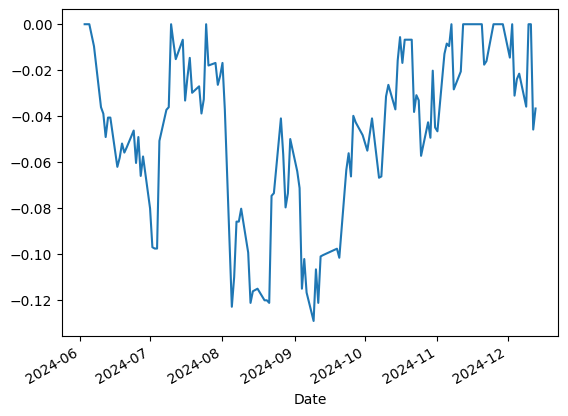

In [20]:
naver_return_df['draw_down'].plot()

In [23]:
# 최저가
min_close_value = naver_return_df['Close'].min()

# 최저가 날짜
min_date = naver_return_df['Close'].idxmin()
print(f'{min_date=}, {min_close_value=}')

# 최고가
max_close_value = naver_return_df['Close'].max()

# 최고가 날짜
max_date = naver_return_df['Close'].idxmax()

print(f'{max_date=}, {max_close_value=}')


min_date=Timestamp('2024-09-09 00:00:00'), min_close_value=np.int64(155000)
max_date=Timestamp('2024-12-11 00:00:00'), max_close_value=np.int64(218000)


In [31]:
mdd = naver_return_df['draw_down'].min()
mdd

np.float64(-0.12921348314606695)

In [32]:
cond_df = stock_data.get_filtered_df(naver_return_df)

AttributeError: module 'finance_fns.stock_data' has no attribute 'get_filtered_df'